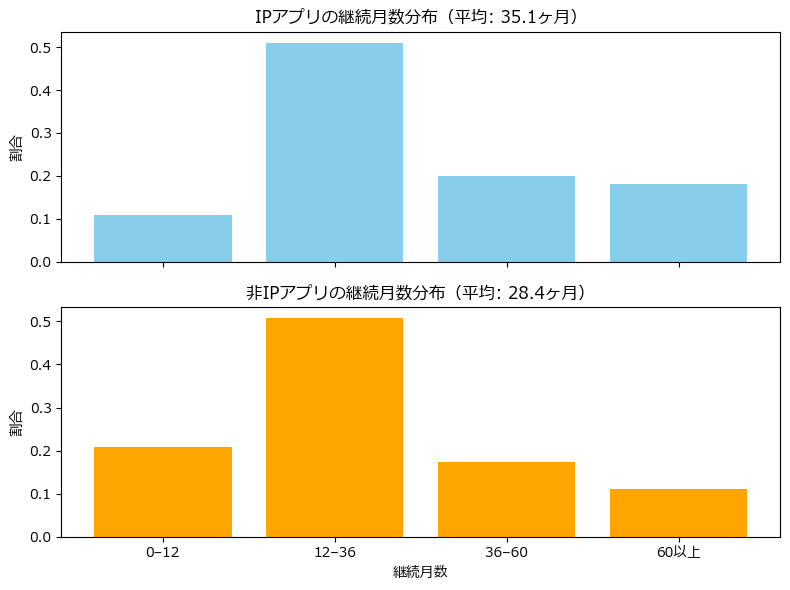

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# フォント設定（日本語対応）
plt.rcParams["font.family"] = "Meiryo"

# データ読み込み
df = pd.read_csv("app_sales_summary.csv", encoding="utf-8-sig")

# 継続月数カテゴリを定義する関数
def categorize_months(months):
    if months < 12:
        return "0–12"
    elif months < 36:
        return "12–36"
    elif months < 60:
        return "36–60"
    else:
        return "60以上"

# 新しい列「継続カテゴリ」を作成
df["継続月数"] = df["サービス継続月数"].apply(categorize_months)

ip_df = df[df["分類"] == "IP"]
non_ip_df = df[df["分類"] == "非IP"]

# IPと非IPを分けて集計（割合）
ip_data = df[df["分類"] == "IP"]["継続月数"].value_counts(normalize=True).sort_index() # normalize=True:割合 Falseは件数, .sort_index():昇順で並べる
non_ip_data = df[df["分類"] == "非IP"]["継続月数"].value_counts(normalize=True).sort_index()

# 平均継続月数を計算
ip_avg = ip_df["サービス継続月数"].mean()
non_ip_avg = non_ip_df["サービス継続月数"].mean()

# 可視化
fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True) # shoarex=True:x軸共有

# IPの棒グラフ
axes[0].bar(ip_data.index, ip_data.values, color="skyblue")
axes[0].set_title(f"IPアプリの継続月数分布（平均: {ip_avg:.1f}ヶ月）") # :.1f 小数点以下1桁で丸める
axes[0].set_ylabel("割合")

# 非IPの棒グラフ
axes[1].bar(non_ip_data.index, non_ip_data.values, color="orange")
axes[1].set_title(f"非IPアプリの継続月数分布（平均: {non_ip_avg:.1f}ヶ月）")
axes[1].set_ylabel("割合")
axes[1].set_xlabel("継続月数")

# レイアウト調整と表示
plt.tight_layout()
plt.show()

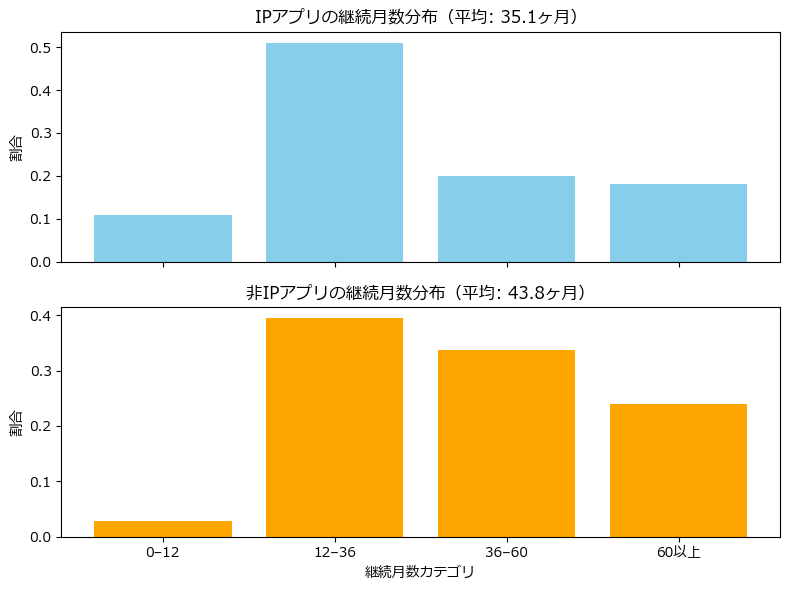

In [ ]:
# 非IPアプリの売上下位178件を除外
non_ip_filtered = non_ip_df.sort_values("売上合計").iloc[178:]

# 継続カテゴリの割合を再集計
ip_data = ip_df["継続月数"].value_counts(normalize=True).sort_index()
non_ip_data = non_ip_filtered["継続月数"].value_counts(normalize=True).sort_index()

# 平均継続月数の再計算
ip_avg = ip_df["サービス継続月数"].mean()
non_ip_avg = non_ip_filtered["サービス継続月数"].mean()

# 可視化
fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

axes[0].bar(ip_data.index, ip_data.values, color="skyblue")
axes[0].set_title(f"IPアプリの継続月数分布（平均: {ip_avg:.1f}ヶ月）")
axes[0].set_ylabel("割合")

axes[1].bar(non_ip_data.index, non_ip_data.values, color="orange")
axes[1].set_title(f"非IPアプリの継続月数分布（平均: {non_ip_avg:.1f}ヶ月）")
axes[1].set_ylabel("割合")
axes[1].set_xlabel("継続月数カテゴリ")

plt.tight_layout()
plt.show()